In [1]:
import numpy as np
import pandas as pd 

In [2]:
df = pd.read_csv("placement.csv")

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [5]:
df.shape

(100, 4)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [6]:
df = df.iloc[:,1:]

In [ ]:
# Steps
# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split (Cross Validation)
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [10]:
import matplotlib.pyplot as plt

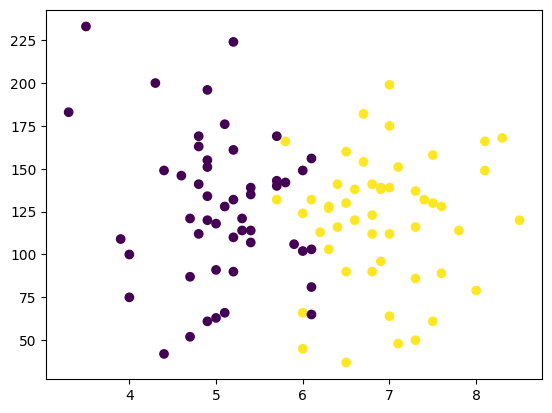

In [11]:
plt.scatter(df['cgpa'], df['iq'],c=df['placement'])

In [12]:
X = df.iloc[:,:2]
y = df.iloc[:,-1]

In [13]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [14]:
y.shape

(100,)

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

In [16]:
X_train

,cgpa,iq
3,7.4,132.0
45,6.0,66.0
75,4.8,169.0
16,5.2,224.0
86,5.1,128.0
...,...,...
55,7.8,114.0
83,7.5,130.0
7,5.0,63.0
76,4.9,155.0


In [17]:
X_test

,cgpa,iq
59,4.8,112.0
87,5.7,132.0
24,4.7,121.0
71,6.1,132.0
11,6.9,138.0
48,6.6,138.0
95,4.3,200.0
56,6.1,65.0
6,5.7,143.0
68,4.0,75.0


In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [21]:
X_train

array([[ 1.18239277,  0.21518169],
       [-0.04077216, -1.42772224],
       [-1.08919925,  1.1362036 ],
       [-0.73972355,  2.50529021],
       [-0.82709248,  0.11561176],
       [ 1.09502384, -1.82600198],
       [ 1.26976169, -1.55218466],
       [ 1.09502384, -0.18309805],
       [-1.08919925,  0.43921405],
       [-0.65235463, -0.23288302],
       [-0.04077216,  0.01604182],
       [ 0.39607245, -2.14960427],
       [-0.73972355,  0.93706373],
       [-0.56498571, -0.4071304 ],
       [-0.30287894,  1.1362036 ],
       [-1.00183032, -1.55218466],
       [ 0.5708103 ,  0.76281634],
       [ 0.920286  ,  0.68813889],
       [ 0.920286  , -1.87578695],
       [ 0.04659676, -0.50670034],
       [ 0.65817922, -0.83030263],
       [-1.08919925,  0.98684869],
       [ 1.96871308,  1.11131111],
       [ 0.30870353, -0.18309805],
       [ 0.5708103 ,  1.45980589],
       [ 0.83291707, -1.47750721],
       [-1.17656817, -1.77621701],
       [ 0.65817922, -0.28266798],
       [-0.56498571,

In [37]:
X_test = scaler.fit_transform(X_test)

In [23]:
X_test


array([[-0.73600262, -0.38213103],
       [ 0.2240008 ,  0.17982637],
       [-0.84266966, -0.1292502 ],
       [ 0.65066898,  0.17982637],
       [ 1.50400535,  0.34841359],
       [ 1.18400421,  0.34841359],
       [-1.26933785,  2.09048154],
       [ 0.65066898, -1.70273093],
       [ 0.2240008 ,  0.48890294],
       [-1.58933898, -1.42175223]])

In [24]:
from sklearn.linear_model import LogisticRegression

In [26]:
clf = LogisticRegression()
clf.fit(X_train,y_train)

LogisticRegression()

In [38]:
y_pred = clf.predict(X_test)

In [29]:
y_pred

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 0])

In [30]:
y_test

59    0
87    1
24    0
71    1
11    1
48    1
95    0
56    0
6     0
68    0
Name: placement, dtype: int64

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8

In [42]:
from mlxtend.plotting import plot_decision_regions

In [43]:
X_train

array([[ 1.18239277,  0.21518169],
       [-0.04077216, -1.42772224],
       [-1.08919925,  1.1362036 ],
       [-0.73972355,  2.50529021],
       [-0.82709248,  0.11561176],
       [ 1.09502384, -1.82600198],
       [ 1.26976169, -1.55218466],
       [ 1.09502384, -0.18309805],
       [-1.08919925,  0.43921405],
       [-0.65235463, -0.23288302],
       [-0.04077216,  0.01604182],
       [ 0.39607245, -2.14960427],
       [-0.73972355,  0.93706373],
       [-0.56498571, -0.4071304 ],
       [-0.30287894,  1.1362036 ],
       [-1.00183032, -1.55218466],
       [ 0.5708103 ,  0.76281634],
       [ 0.920286  ,  0.68813889],
       [ 0.920286  , -1.87578695],
       [ 0.04659676, -0.50670034],
       [ 0.65817922, -0.83030263],
       [-1.08919925,  0.98684869],
       [ 1.96871308,  1.11131111],
       [ 0.30870353, -0.18309805],
       [ 0.5708103 ,  1.45980589],
       [ 0.83291707, -1.47750721],
       [-1.17656817, -1.77621701],
       [ 0.65817922, -0.28266798],
       [-0.56498571,

In [45]:
y_train.values

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1])

<Axes: >

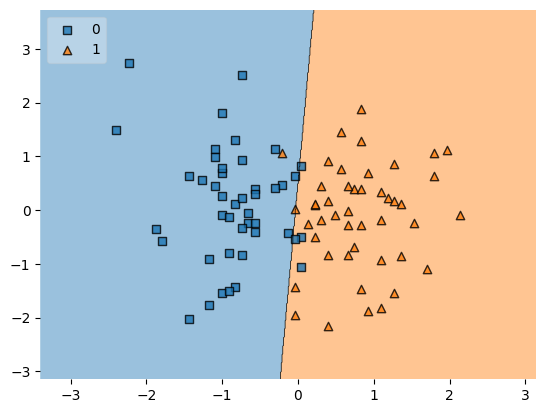

In [46]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [48]:
# To create a file for deployment in the server
import pickle 

In [49]:
pickle.dump(clf,open('model.pkl','wb'))